In [71]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # used for data analysis and data maipulation
import numpy as np # used for working with arrays
import seaborn as sns # used for visualization
from scipy.stats import norm # used statistics for normal distribution
from scipy.stats import skew # to handle skewness
import statsmodels.formula.api as smf # to Create a Model from a formula and dataframe
import matplotlib.pyplot as plt # used for visualization

In [72]:
dataset=pd.read_csv("/content/delivery_time.csv")

In [73]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [74]:
#EDA And Data Visualization

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [76]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [77]:
#Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [78]:
print(skew(dataset.delivery_time))

0.326702631656106


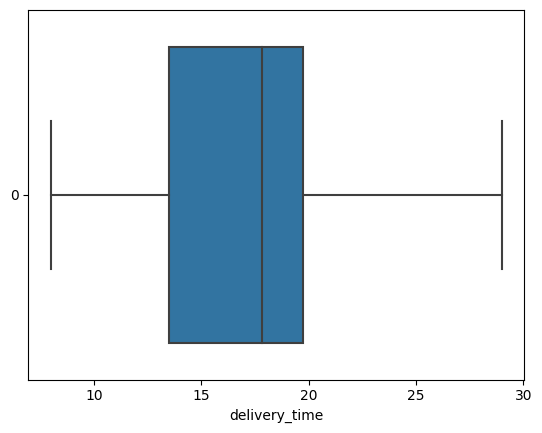

In [79]:
sns.boxplot(dataset['delivery_time'],orient='h')
plt.xlabel("delivery_time")
plt.show()

<Axes: xlabel='delivery_time', ylabel='Density'>

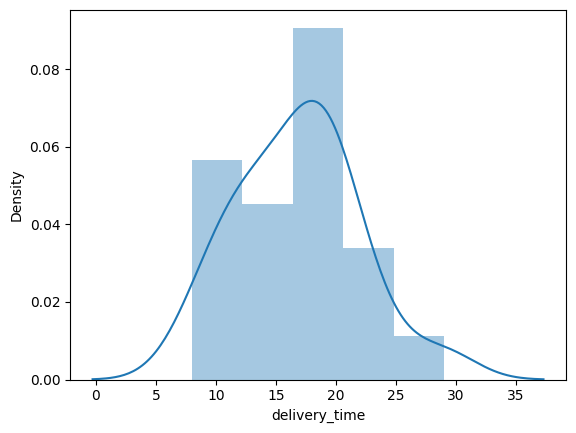

In [80]:
sns.distplot(dataset['delivery_time'])

In [81]:
print(skew(dataset.sorting_time))

0.043680994983108075


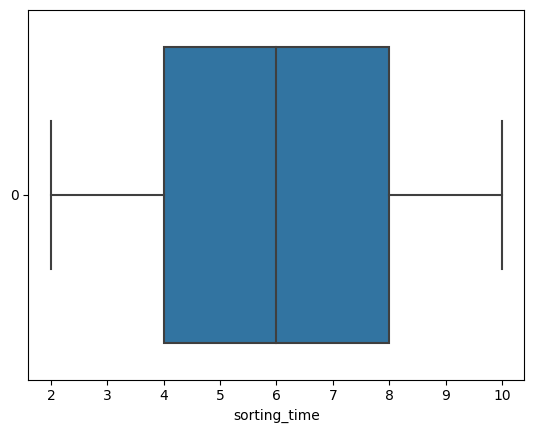

In [82]:
sns.boxplot(dataset['sorting_time'],orient='h')
plt.xlabel("sorting_time")
plt.show()

In [83]:
# The observations for Sorting Time lies nearly between 4 to 8.
# It means the Sorting Time data is symmetric and skewed.
# The median sorting time is approximately around 6.

<Axes: xlabel='sorting_time', ylabel='Density'>

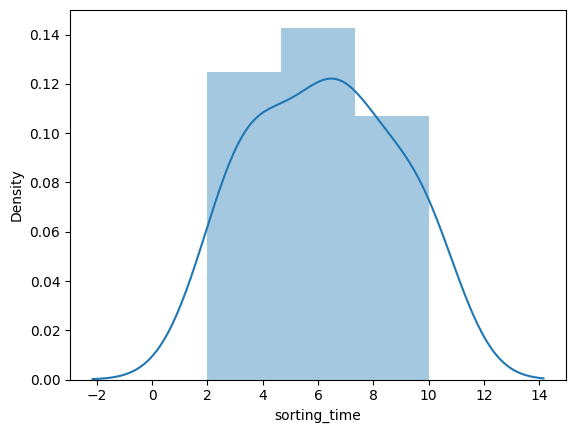

In [84]:
sns.distplot(dataset['sorting_time'])

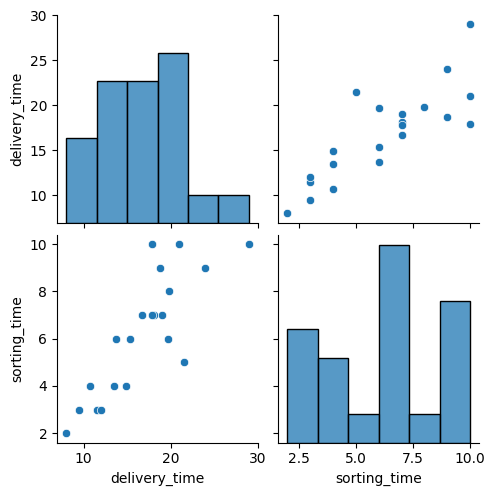

In [85]:
sns.pairplot(dataset)

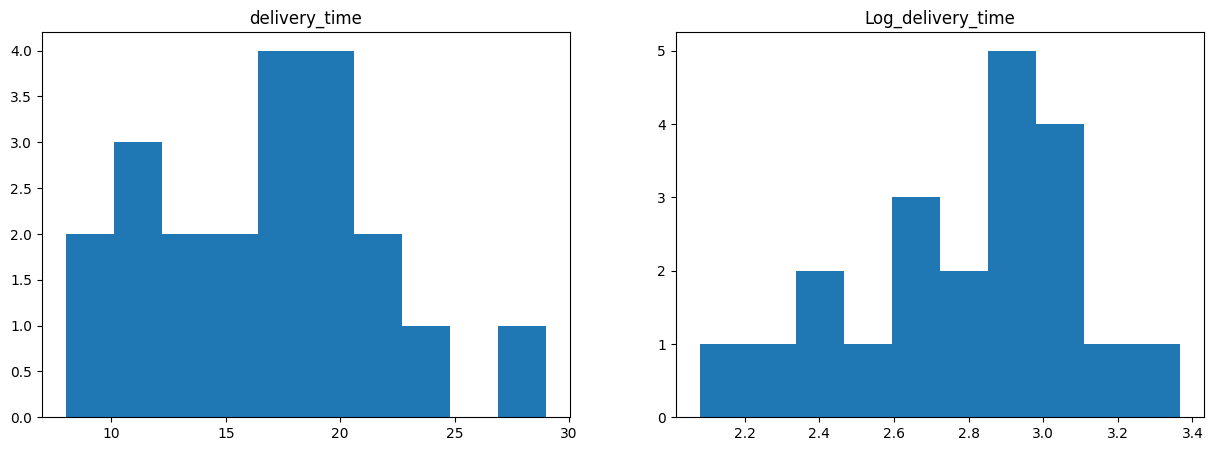

In [86]:
#Transformation for Continuous Variable
# log trasformation :
dataset['log_delivery_time']= np.log(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("delivery_time")
ax[1].hist(dataset['log_delivery_time']);ax[1].set_title("Log_delivery_time")
plt.show()

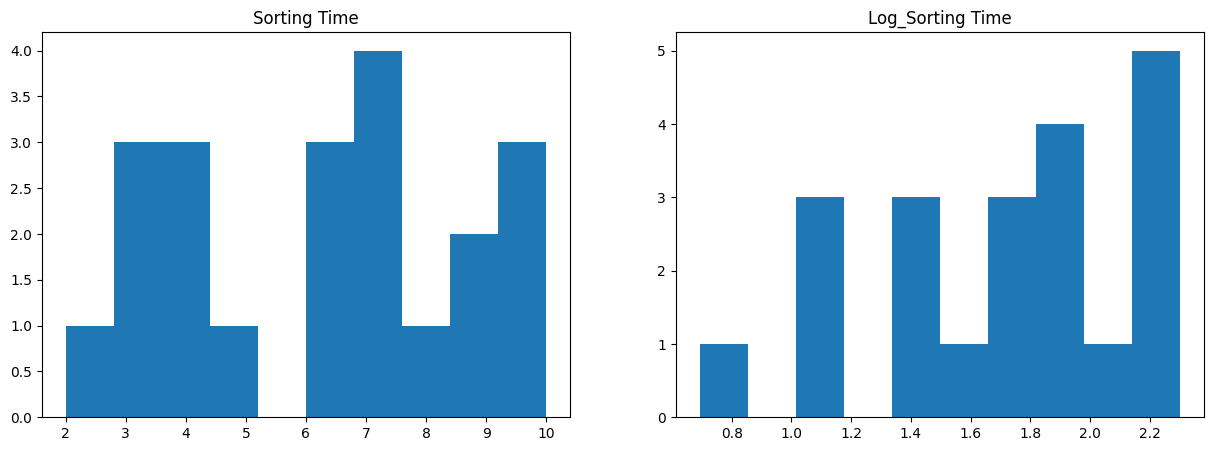

In [87]:
dataset['log_sorting_time']= np.log(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("Sorting Time")
ax[1].hist(dataset['log_sorting_time']);ax[1].set_title("Log_Sorting Time")
plt.show()

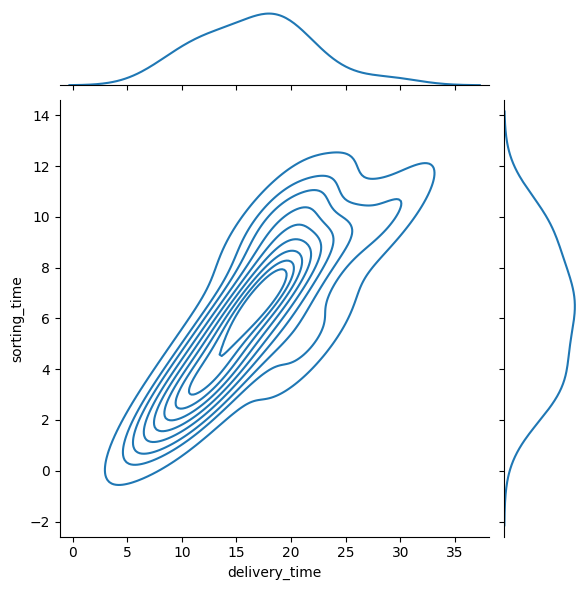

In [88]:

sns.jointplot(x='delivery_time', y='sorting_time', data=dataset, kind='kde')
plt.show()


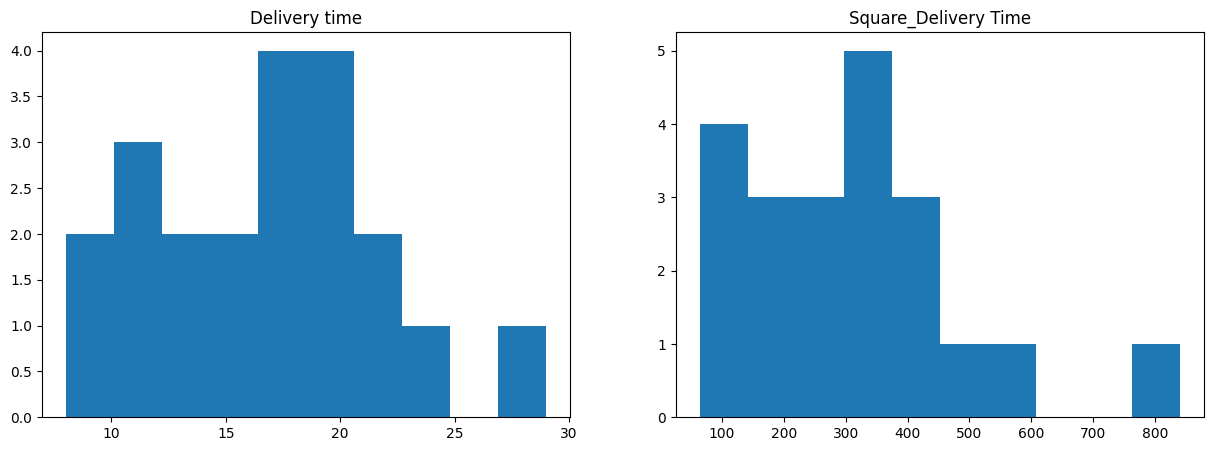

In [89]:
# square trasformation :
dataset['sqr_delivery_time']= np.square(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("Delivery time")
ax[1].hist(dataset['sqr_delivery_time']);ax[1].set_title("Square_Delivery Time")
plt.show()

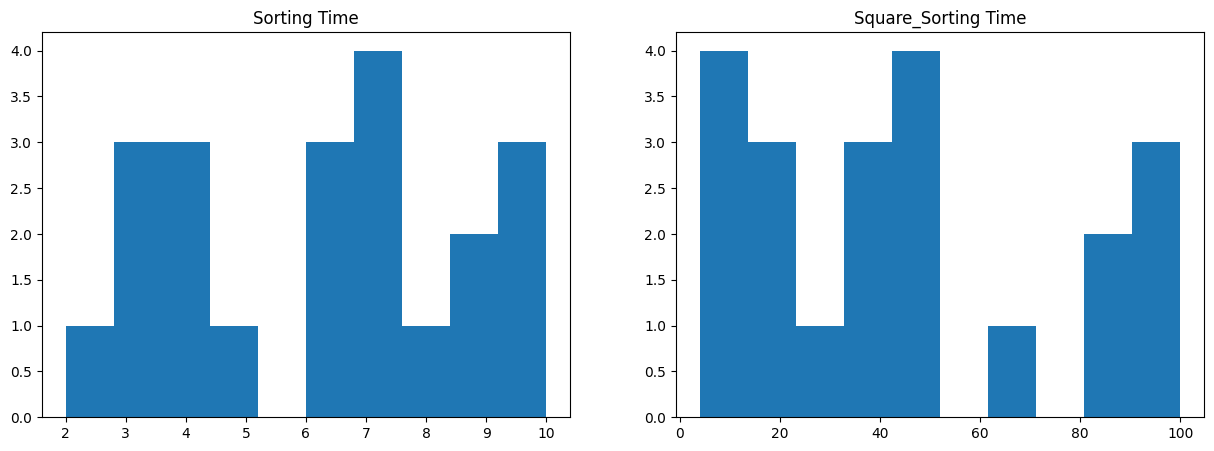

In [90]:
dataset['sqr_sorting_time']= np.square(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("Sorting Time")
ax[1].hist(dataset['sqr_sorting_time']);ax[1].set_title("Square_Sorting Time")
plt.show()

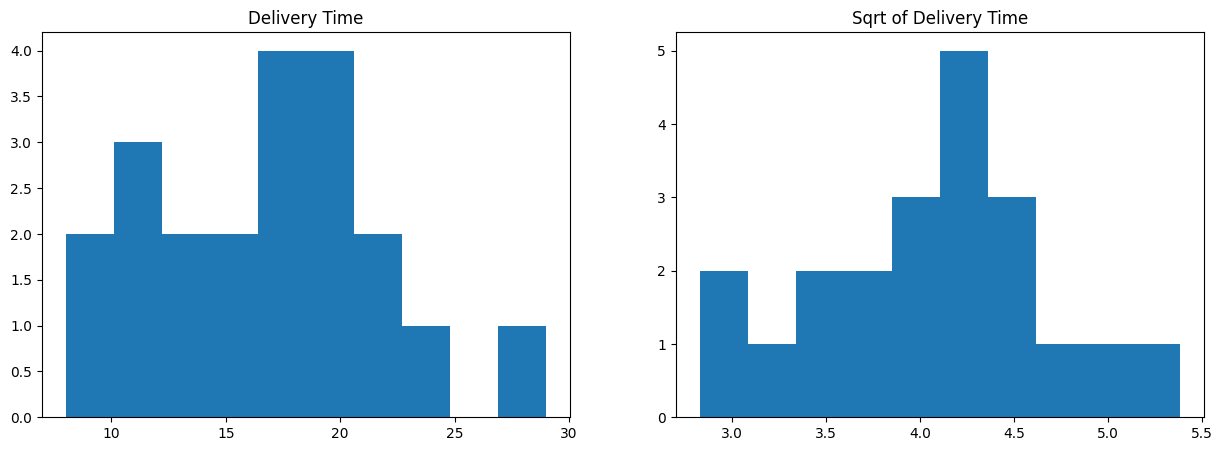

In [91]:
# square root trasformation :
dataset['sqrt_delivery_time']= np.sqrt(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("Delivery Time")
ax[1].hist(dataset['sqrt_delivery_time']);ax[1].set_title("Sqrt of Delivery Time")
plt.show()

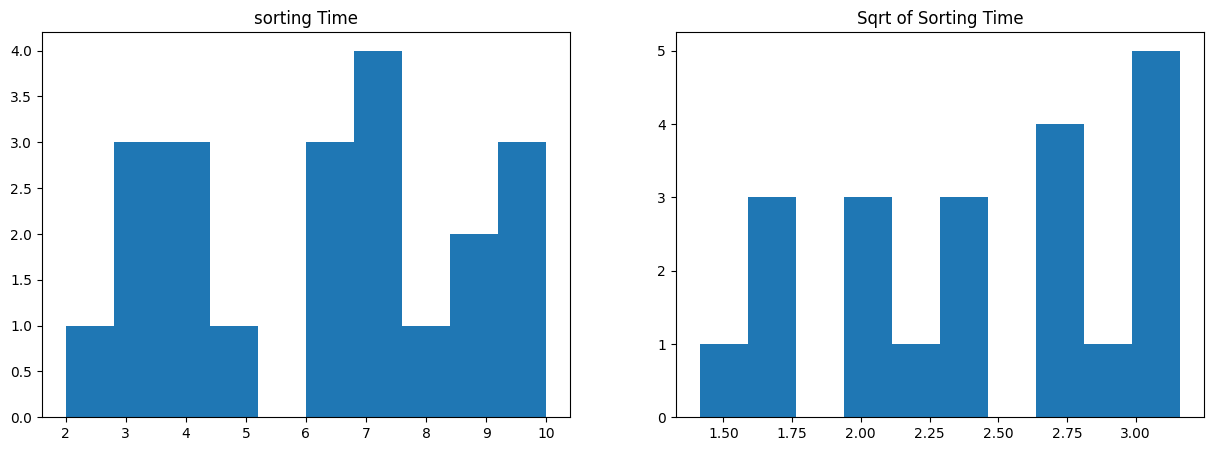

In [92]:
dataset['sqrt_sorting_time']= np.sqrt(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("sorting Time")
ax[1].hist(dataset['sqrt_sorting_time']);ax[1].set_title("Sqrt of Sorting Time")
plt.show()

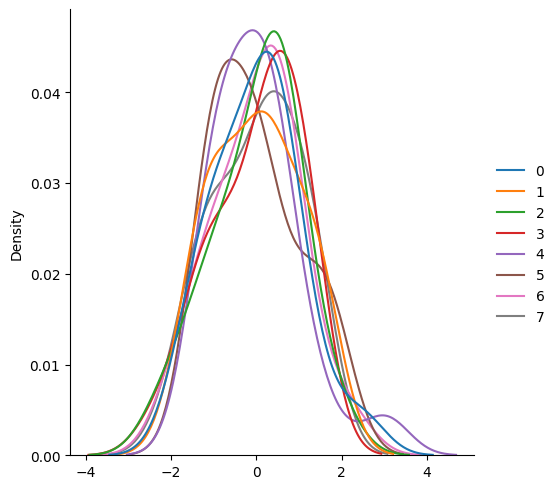

In [93]:
from sklearn.preprocessing import scale
dataset1 = dataset.values
dataset2 = scale(dataset1)  # Used to standardized the dataset
sns.displot(dataset2, kind='kde')
plt.show()

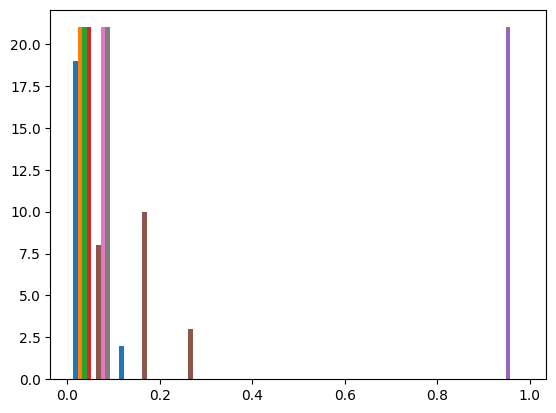

In [94]:
# Normalize Data set
from sklearn.preprocessing import normalize
dataset2 = normalize(dataset)
plt.hist(dataset2)
plt.show()

In [95]:
#Model Building
model1=smf.ols("delivery_time~ sorting_time",data=dataset).fit()
#Model Testing
#finding coefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [96]:
#finding tvalues and pvalues
model1.tvalues,model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [97]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        07:53:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#findings rsquared values
model1.rsquared,model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [38]:
#manual prediction for say sorting time 6
delivery_time=(6.582734)+(1.649020)*(6)

In [39]:
delivery_time

16.476854

In [40]:
#Automatic Prediction for sorting time 6,8
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [42]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

In [43]:
#from this we understand the model is best


In [44]:
"""
Build a prediction model for salary_hike
Build a simple linear regression model by performing EDA
and do necessary transformations and select the best model using R or Python.
"""

'\nBuild a prediction model for salary_hike\nBuild a simple linear regression model by performing EDA \nand do necessary transformations and select the best model using R or Python.\n'

In [98]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [108]:
df=pd.read_csv("/content/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [109]:
#EDA and visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [110]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [148]:
#Feature engineering
#df = df.rename(columns = {'YearsExperience':'YE','salary':'Sal'},inplace=False)
#df
df.columns = df.columns.str.strip().str.lower()
df = df.rename(columns={'yearsexperience': 'YE', 'salary': 'sal'}, inplace=False)
df.head

<bound method NDFrame.head of       ye       sal    log_ye      log_s
0    1.1   39343.0  0.095310  10.580073
1    1.3   46205.0  0.262364  10.740843
2    1.5   37731.0  0.405465  10.538237
3    2.0   43525.0  0.693147  10.681091
4    2.2   39891.0  0.788457  10.593906
5    2.9   56642.0  1.064711  10.944506
6    3.0   60150.0  1.098612  11.004597
7    3.2   54445.0  1.163151  10.904946
8    3.2   64445.0  1.163151  11.073567
9    3.7   57189.0  1.308333  10.954117
10   3.9   63218.0  1.360977  11.054344
11   4.0   55794.0  1.386294  10.929422
12   4.0   56957.0  1.386294  10.950052
13   4.1   57081.0  1.410987  10.952227
14   4.5   61111.0  1.504077  11.020447
15   4.9   67938.0  1.589235  11.126351
16   5.1   66029.0  1.629241  11.097849
17   5.3   83088.0  1.667707  11.327656
18   5.9   81363.0  1.774952  11.306676
19   6.0   93940.0  1.791759  11.450412
20   6.8   91738.0  1.916923  11.426692
21   7.1   98273.0  1.960095  11.495505
22   7.9  101302.0  2.066863  11.525861
23   8.2  

In [120]:
print(skew(df.ye))

0.3603123252525561


Text(0.5, 0, 'YearsExperiens')

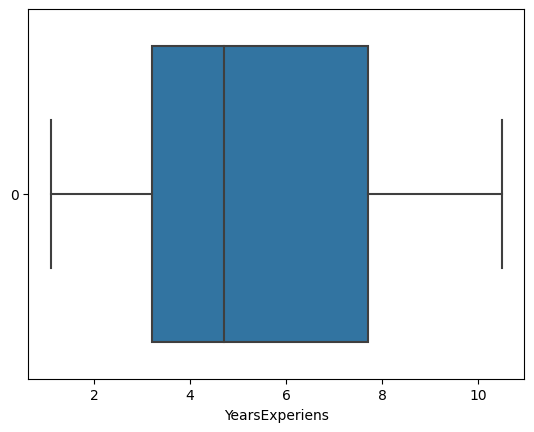

In [121]:
sns.boxplot(df['ye'],orient='h')
plt.xlabel("YearsExperiens")

In [57]:
# The data for Year Experience is skewed right.
# All the observations lies in the intervals of approximately 3 to 8
# We can say that the median years of experience is 5.2 years.

Text(0.5, 0, 'YearsExperiens')

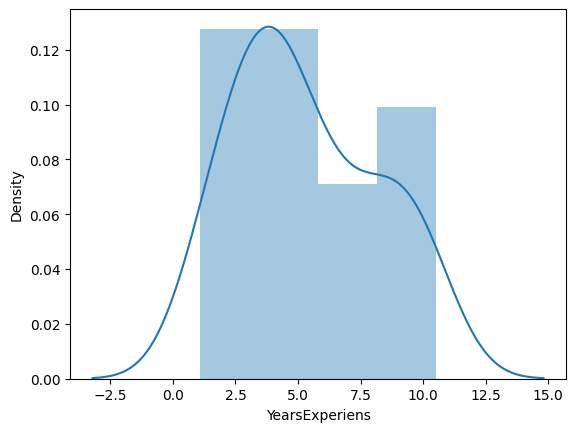

In [122]:
sns.distplot(df['ye'])
plt.xlabel("YearsExperiens")

In [60]:
# The distribution of Year Experience data is slightly more on the right tail of the curve

In [124]:
print(skew(df. sal))

0.3361618825592921


Text(0.5, 0, 'Salary')

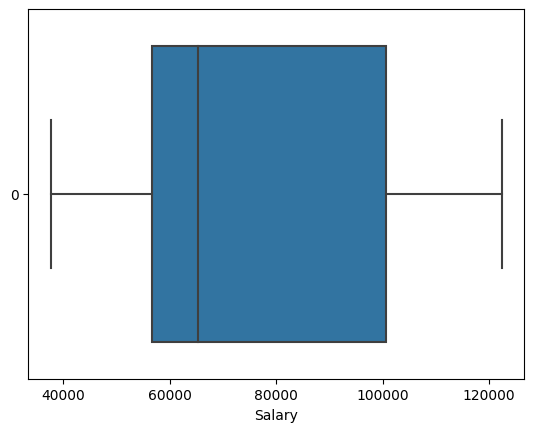

In [127]:
sns.boxplot(df['sal'],orient='h')
plt.xlabel("Salary")

In [128]:
# The observations for Salary lies nearly between 57000 to 110000.
# The data is skewed towars right side.
# The median Salary is nearly 65000.

Text(0.5, 0, 'Salary')

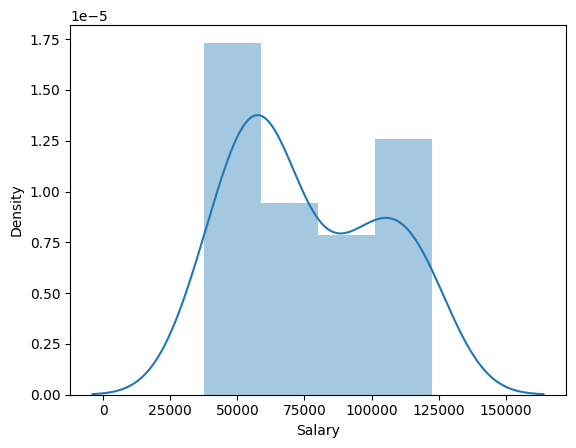

In [131]:
sns.distplot(df['sal'])
plt.xlabel("Salary")

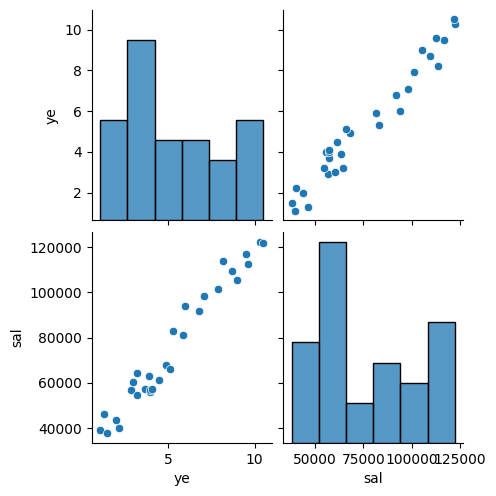

In [132]:
sns.pairplot(df)

<Axes: ylabel='Density'>

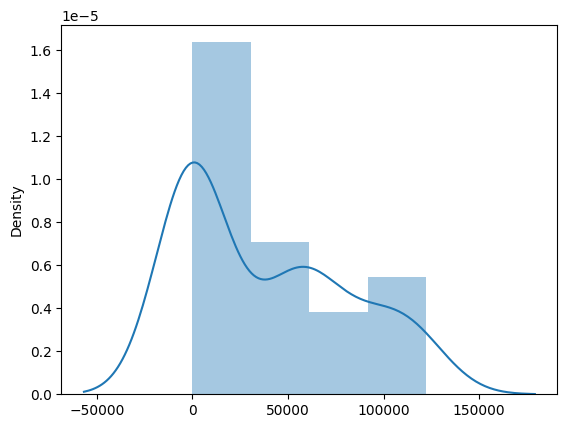

In [133]:
sns.distplot(df)

In [134]:
#Correlation Analysis
df.corr()

,ye,sal
ye,1.000000,0.978242
sal,0.978242,1.000000


<Axes: >

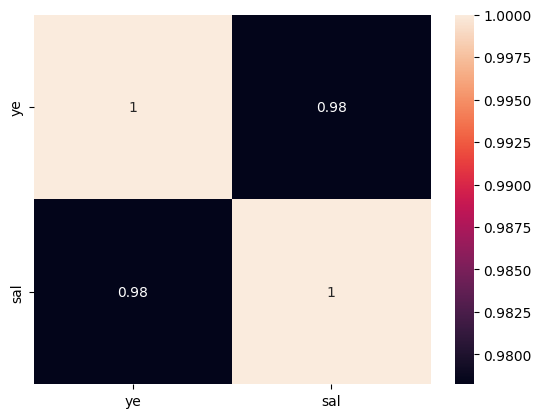

In [135]:
sns.heatmap(df.corr(),annot=True)


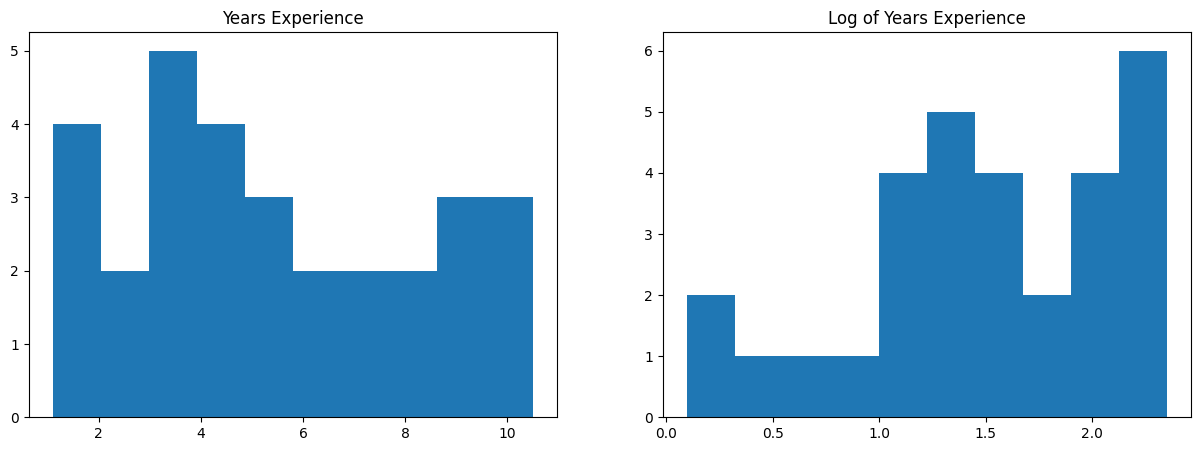

In [138]:
#Transformation for continuous variable
# log trasformation :
df['log_ye']= np.log(df["ye"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['ye']);ax[0].set_title("Years Experience")
ax[1].hist(df['log_ye']);ax[1].set_title("Log of Years Experience")
plt.show()

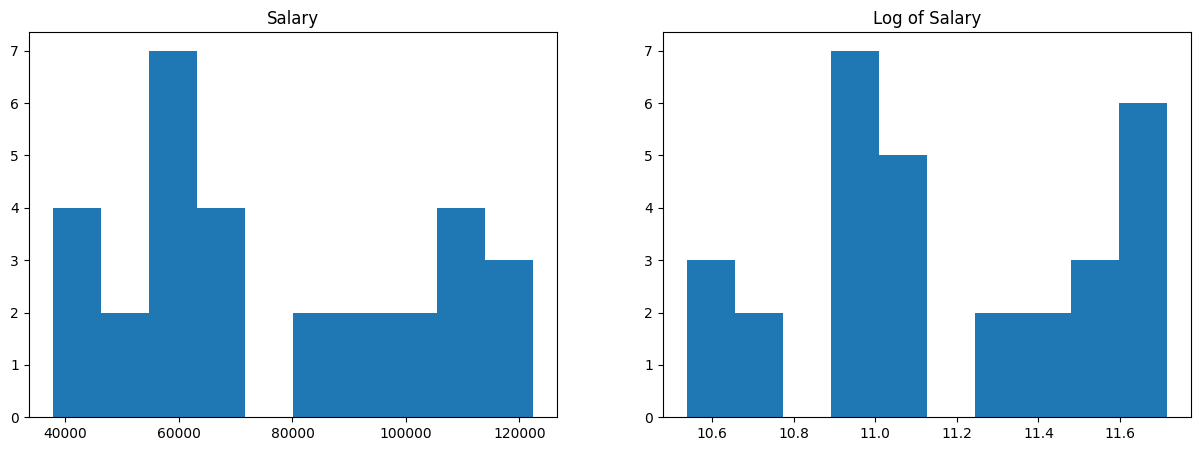

In [140]:
# log trasformation :
df['log_S']= np.log(df["sal"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['sal']);ax[0].set_title("Salary")
ax[1].hist(df['log_S']);ax[1].set_title("Log of Salary")
plt.show()

In [149]:
print(df.columns)



Index(['ye', 'sal', 'log_ye', 'log_s'], dtype='object')


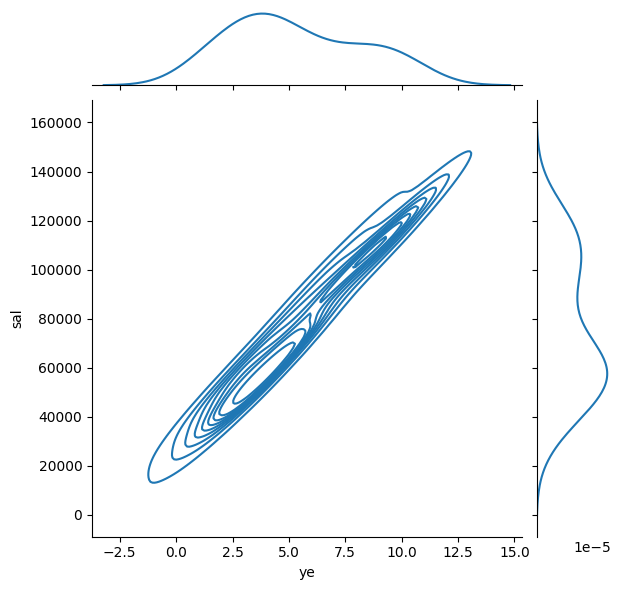

In [152]:
sns.jointplot(x='ye', y='sal', data=df, kind='kde')
plt.show()


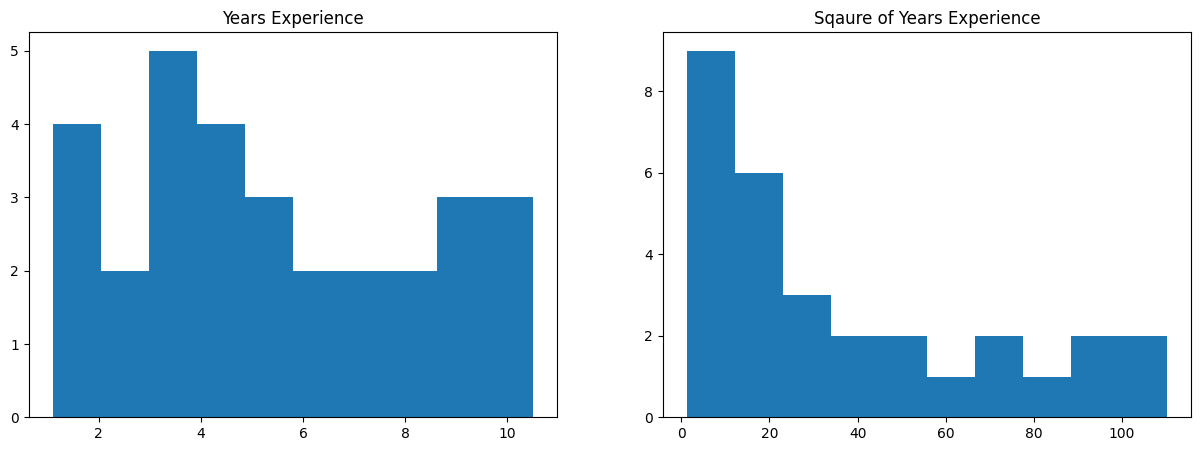

In [155]:
# square trasformation :
df['sqr_YE']= np.square(df["ye"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['ye']);ax[0].set_title("Years Experience")
ax[1].hist(df['sqr_YE']);ax[1].set_title("Sqaure of Years Experience")
plt.show()

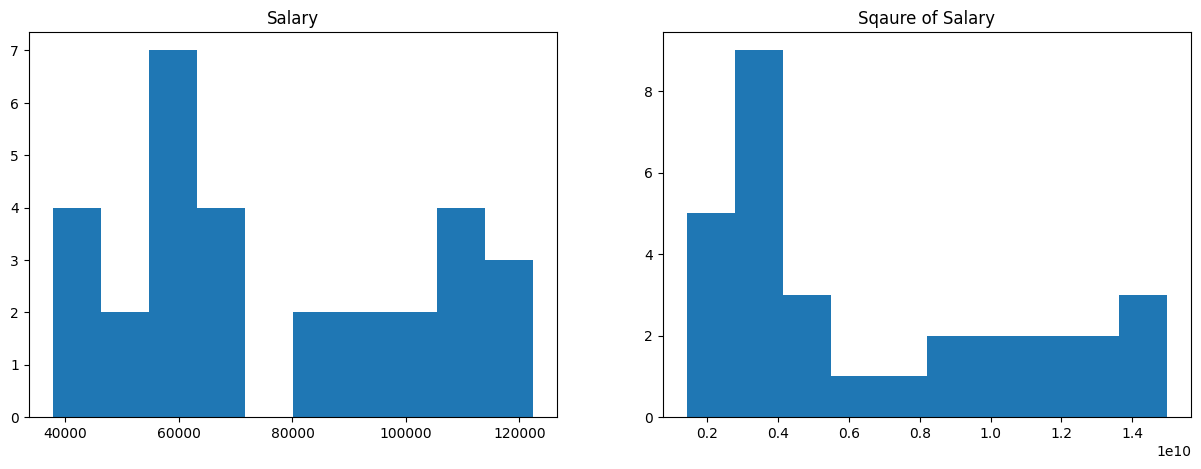

In [156]:
# square trasformation :
df['sqr_S']= np.square(df["sal"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['sal']);ax[0].set_title("Salary")
ax[1].hist(df['sqr_S']);ax[1].set_title("Sqaure of Salary")
plt.show()

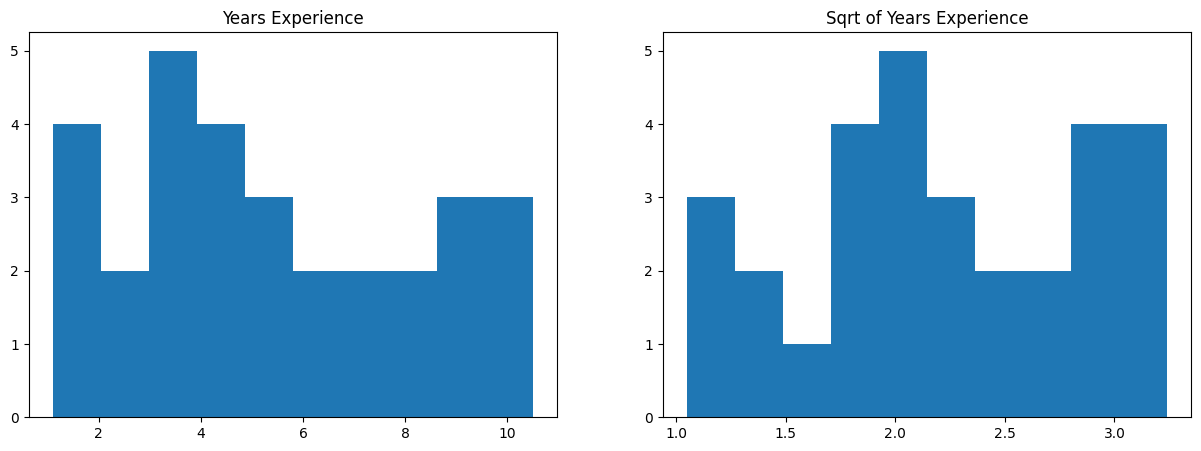

In [157]:
# square root trasformation :
df['sqrt_YE']= np.sqrt(df["ye"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['ye']);ax[0].set_title("Years Experience")
ax[1].hist(df['sqrt_YE']);ax[1].set_title("Sqrt of Years Experience")
plt.show()

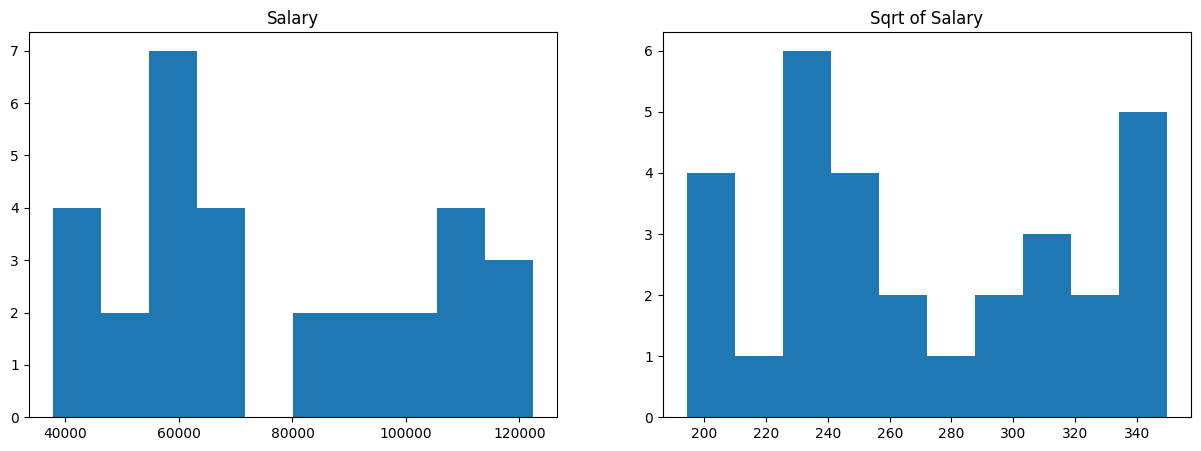

In [158]:
# square root trasformation :
df['sqrt_S']= np.sqrt(df["sal"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['sal']);ax[0].set_title("Salary")
ax[1].hist(df['sqrt_S']);ax[1].set_title("Sqrt of Salary")
plt.show()

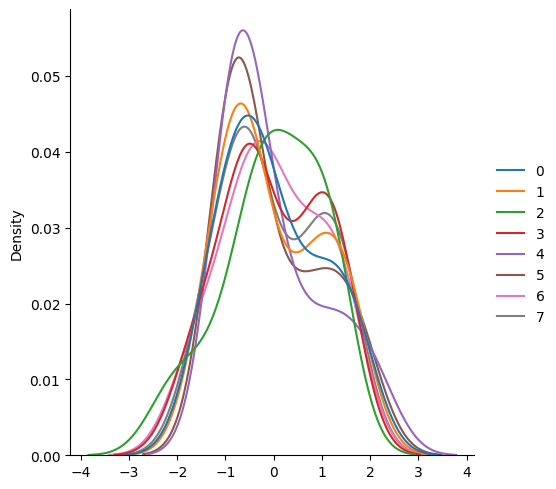

In [159]:
from sklearn.preprocessing import scale
df1 = df.values
df2 = scale(df1)  # Used to standardized the dataset
sns.displot(df2, kind='kde')
plt.show()

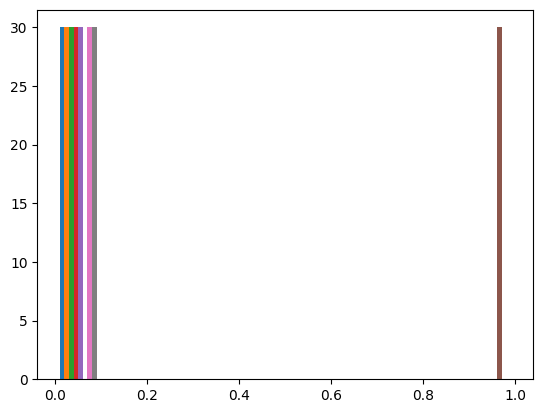

In [160]:
# Normalize Data set
from sklearn.preprocessing import normalize
df2 = normalize(df)
plt.hist(df2)
plt.show()
#df1

In [161]:
#Correlation Analysis
df.corr()

,ye,sal,log_ye,log_s,sqr_YE,sqr_S,sqrt_YE,sqrt_S
ye,1.000000,0.978242,0.953797,0.965384,0.977067,0.973105,0.989850,0.974595
sal,0.978242,1.000000,0.924061,0.988531,0.956724,0.991647,0.964884,0.997315
log_ye,0.953797,0.924061,1.000000,0.951428,0.872019,0.886512,0.986620,0.939719
log_s,0.965384,0.988531,0.951428,1.000000,0.915775,0.961261,0.971269,0.996920
sqr_YE,0.977067,0.956724,0.872019,0.915775,1.000000,0.976774,0.937950,0.939218
sqr_S,0.973105,0.991647,0.886512,0.961261,0.976774,1.000000,0.943786,0.979669
sqrt_YE,0.989850,0.964884,0.986620,0.971269,0.937950,0.943786,1.000000,0.970541
sqrt_S,0.974595,0.997315,0.939719,0.996920,0.939218,0.979669,0.970541,1.000000


<Axes: >

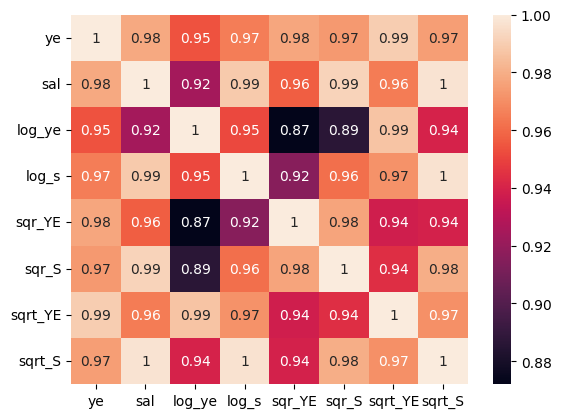

In [162]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='sal', ylabel='ye'>

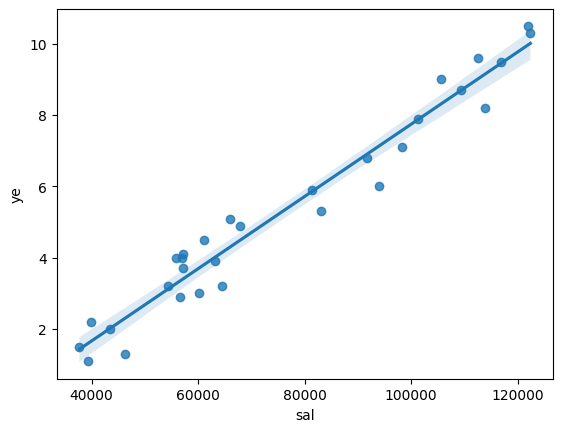

In [163]:
sns.regplot(x=df['sal'],y=df['ye'])

In [165]:
#Model building
model=smf.ols('sal~ye',data=df).fit()
#Model Testing
model.params


Intercept    25792.200199
ye            9449.962321
dtype: float64

In [166]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        08:26:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
#finding tvalues and pvalues
model.tvalues,model.pvalues

(Intercept    11.346940
 ye           24.950094
 dtype: float64,
 Intercept    5.511950e-12
 ye           1.143068e-20
 dtype: float64)

In [168]:
#finding rsquared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [169]:
#manual prediction for say 2 years experience
Salary=(25792.200199)+(9449.962321)*(2)
Salary

44692.124841

In [170]:
#Automatic prediction for say 4&5 years experience
new_data = pd.Series([4,5])
new_data

0    4
1    5
dtype: int64

In [173]:
data_pred=pd.DataFrame(new_data,columns=['ye'])
data_pred

,ye
0,4
1,5


In [174]:
model.predict(data_pred)

0    63592.049484
1    73042.011806
dtype: float64

In [ ]:
#From this we conclude, this is the best model.